In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("clustering_ready_dataset_uniform.csv")

In [ ]:
data

,study_time_sec,quiz_score,quiz_time_sec
0,262,0.95,228
1,383,0.16,72
2,91,0.87,192
3,442,0.02,292
4,510,0.21,79
...,...,...,...
245,534,0.39,250
246,297,0.38,155
247,223,0.75,166
248,185,0.90,134


In [ ]:
data=data.values

In [ ]:
data.shape

(250, 3)

In [ ]:
Scaler = StandardScaler()

In [ ]:
scaled_data=Scaler.fit_transform(data)

In [ ]:
wcss=[]
for i in range(1,25):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(scaled_data)
    wcss.append(kmean.inertia_)

In [ ]:
wcss

[749.9999999999999,
 559.0624872291645,
 435.2546267201956,
 332.71470887013766,
 285.24749365961,
 232.70028592195817,
 205.08412023411185,
 197.86913254398564,
 171.44900006604735,
 158.3893098878483,
 149.9017419439814,
 137.2518890758062,
 132.54541596735078,
 125.03304102770404,
 112.05827173454848,
 105.34830726406388,
 101.67149105832947,
 98.61724516008344,
 91.56005107334268,
 87.82483344682433,
 86.92108475007555,
 83.85214546749461,
 78.13814417578733,
 75.02607234514939]

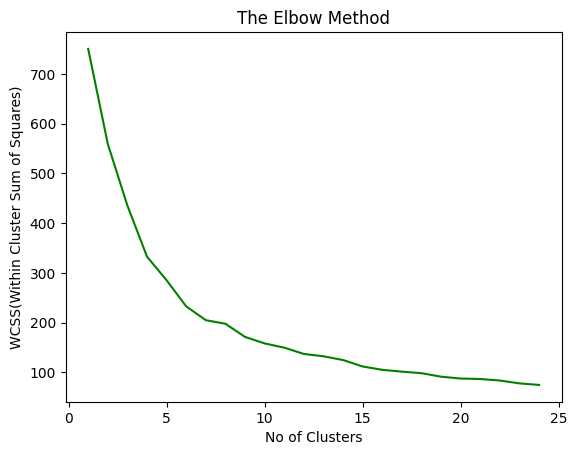

In [ ]:
plt.plot(range(1,25),wcss,color='green')
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS(Within Cluster Sum of Squares)")
plt.show()

In [ ]:
Clusters=10

In [ ]:
model = KMeans(n_clusters=Clusters,init='k-means++',random_state=42)
model.fit(scaled_data)

KMeans(n_clusters=10, random_state=42)

In [ ]:
centers=model.cluster_centers_

In [ ]:
Scaler.inverse_transform(centers)

array([[4.33548387e+02, 8.03225806e-01, 1.08903226e+02],
       [1.89900000e+02, 2.14000000e-01, 2.54100000e+02],
       [2.65476190e+02, 2.05714286e-01, 1.66238095e+02],
       [1.66896552e+02, 6.89655172e-01, 8.60000000e+01],
       [4.56592593e+02, 3.13703704e-01, 2.51740741e+02],
       [5.02500000e+02, 1.80000000e-01, 8.94166667e+01],
       [1.79035714e+02, 7.67857143e-01, 2.21285714e+02],
       [1.63800000e+02, 1.92500000e-01, 8.02000000e+01],
       [3.86000000e+02, 4.52105263e-01, 8.67368421e+01],
       [4.97806452e+02, 7.99032258e-01, 2.27032258e+02]])

In [ ]:
def get_cluster_feedback(cluster_number: int) -> dict:
    tips_data = {
        0: {
            "grade": "A",
            "tips": [
                "Great performance! Keep up your balanced study habits.",
                "Continue reviewing material regularly.",
                "You might help peers improve too."
            ]
        },
        1: {
            "grade": "E",
            "tips": [
                "Focus more on understanding concepts before quizzes.",
                "Try breaking study sessions into smaller, focused chunks.",
                "Analyze where you lose time in quizzes."
            ]
        },
        2: {
            "grade": "E",
            "tips": [
                "Your quiz scores are low. Rethink how you're studying.",
                "Consider using flashcards or active recall.",
                "Take more time reviewing before the quiz."
            ]
        },
        3: {
            "grade": "B",
            "tips": [
                "Good quiz performance! Keep improving efficiency.",
                "Try to slightly increase your study time.",
                "Regular revision can solidify this level."
            ]
        },
        4: {
            "grade": "D",
            "tips": [
                "Rethink your study strategy; it’s not effective.",
                "Consider practicing with mock quizzes.",
                "Break long study sessions into short bursts."
            ]
        },
        5: {
            "grade": "E",
            "tips": [
                "You study a lot but scores are low — quality over quantity!",
                "Change study methods — try teaching others.",
                "Use concept mapping for better retention."
            ]
        },
        6: {
            "grade": "B",
            "tips": [
                "You're doing well, but quiz time is high — try timed practice.",
                "Continue with active revision methods.",
                "Focus on speed along with accuracy."
            ]
        },
        7: {
            "grade": "E",
            "tips": [
                "Very low performance — revisit basics.",
                "Study in short, focused intervals.",
                "Watch tutorial videos for better understanding."
            ]
        },
        8: {
            "grade": "C",
            "tips": [
                "Moderate scores — try to improve retention.",
                "Add daily revision to your schedule.",
                "Practice low-stakes quizzes to build confidence."
            ]
        },
        9: {
            "grade": "B",
            "tips": [
                "Great scores! Reduce quiz time for efficiency.",
                "Consider simulating exam conditions.",
                "Keep reviewing material lightly before quizzes."
            ]
        },
    }
    return tips_data.get(cluster_number, {"grade": "Unknown", "tips": ["No data available."]})


In [ ]:
def getInfo(study_time,quiz_score,quiz_time):
    start_data=np.array([study_time,quiz_score,quiz_time])
    start_data=start_data.reshape(1,-1)
    my_data = Scaler.transform(start_data)
    my_cluster=model.predict(my_data)
    return get_cluster_feedback(my_cluster[0])


In [ ]:
getInfo(320,0.94,88)

{'grade': 'A',
 'tips': ['Great performance! Keep up your balanced study habits.',
  'Continue reviewing material regularly.',
  'You might help peers improve too.']}

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

labels = model.labels_

# `X` is your features, `labels` are cluster labels from KMeans or other method
sil_score = silhouette_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)
ch_score = calinski_harabasz_score(scaled_data, labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_score)
print("Calinski-Harabasz Index:", ch_score)


Silhouette Score: 0.26713621349540034
Davies-Bouldin Index: 1.0621490139222876
Calinski-Harabasz Index: 96.46756217568857


In [ ]:
import joblib

In [ ]:
joblib.dump(model,'weakness_model.pkl')

['weakness_model.pkl']

In [ ]:
joblib.dump(Scaler,'Scaler.pkl')

['Scaler.pkl']